### Credit Classification

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv('german.data', names=['checking_account', 
                                              'duration', 
                                              'credit_history', 
                                              'purpose', 
                                              'credit_amount', 
                                              'savings_acc', 
                                              'present_emp_since', 
                                              'inst_rate', 
                                              'personal_status', 
                                              'other_debtors', 
                                              'residing_since', 
                                              'property', 
                                              'age', 
                                              'inst_plans', 
                                              'housing', 
                                              'existing_credits', 
                                              'job', 
                                              'no_of_people_liable', 
                                              'telephone', 
                                              'foreign_worker', 
                                              'status'], sep = ' ')

In [3]:
credit_df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_account     1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_acc          1000 non-null   object
 6   present_emp_since    1000 non-null   object
 7   inst_rate            1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_debtors        1000 non-null   object
 10  residing_since       1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  inst_plans           1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

## Attribute Description

- checking_account (Object)
    - A11 : ...< 0 DM
    - A12 : 0 <= ... < 200 DM
    - A13 : ... >= 200 DM
    - A14 : no checking account

- duration (int64) in months

- credit_history (Object)
    - A30 : no credits taken / all credits paid back duly
    - A31 : all credits at this bank paid back duly
    - A32 : existing credits paid back duly till now
    - A33 : delay in paying off in the past
    - A34 : critical account / other credits existing (not at this bank)

- purpose (Object)
    - A40 : car (new)
    - A41 : car (used)
    - A42 : furniture/equipment
    - A43 : radio/television
	- A44 : domestic appliances
	- A45 : repairs
	- A46 : education
	- A47 : (vacation - does not exist?)
	- A48 : retraining
	- A49 : business
	- A410 : others

- credit_amount (int64)

- saving_acc (Object)
    - A61 :   ... <  100 DM
	- A62 :   100 <= ... <  500 DM
	- A63 :   500 <= ... < 1000 DM
	- A64 :   .. >= 1000 DM
    - A65 :   unknown/ no savings account

- present_emp_since (Object)
    - A71 : unemployed
	- A72 : ... < 1 year
	- A73 : 1  <= ... < 4 years  
	- A74 : 4  <= ... < 7 years
	- A75 : .. >= 7 years

- inst_rate (int64) in percentage

- personal_status (Object)
    - A91 : male   : divorced/separated
	- A92 : female : divorced/separated/married
    - A93 : male   : single
	- A94 : male   : married/widowed
	- A95 : female : single

- other_debtors (Object)
    - A101 : none
	- A102 : co-applicant
	- A103 : guarantor

- residing_since (int64)

- property (Object)
    - A121 : real estate
	- A122 : if not A121 : building society savings agreement / life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
	- A124 : unknown / no property

- age (int64)

- inst_plans (Object)
    - A141 : bank
	- A142 : stores
	- A143 : none

- housing (Object)
    - A151 : rent
	- A152 : own
	- A153 : for free

- existing_credits (int64)

- job (Object)
    - A171 : unemployed/ unskilled  - non-resident
	- A172 : unskilled - resident
	- A173 : skilled employee / official
	- A174 : management/ self-employed / highly qualified employee/ officer

- no_of_people_liable (int64)

- telephone (Object)
    - A191 : none
	- A192 : yes, registered under the customers name

- foreign_worker (Object)
    - A201 : yes
	- A202 : no

- Status (int64)
	- 1 : Good
	- 2 : Bad

In [5]:
credit_df.iloc[:5, :7]

,checking_account,duration,credit_history,purpose,credit_amount,savings_acc,present_emp_since
0,A11,6,A34,A43,1169,A65,A75
1,A12,48,A32,A43,5951,A61,A73
2,A14,12,A34,A46,2096,A61,A74
3,A11,42,A32,A42,7882,A61,A74
4,A11,24,A33,A40,4870,A61,A73


In [6]:
credit_df.iloc[:5, 7:]

,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,existing_credits,job,no_of_people_liable,telephone,foreign_worker,status
0,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
credit_df.status.value_counts()

status
1    700
2    300
Name: count, dtype: int64

In [8]:
credit_df.status = credit_df.status.map({1:0, 2:1})  # 1 -> Good (0), 2 -> Bad (1)
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [9]:
# Seperating X_features and Y_features
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checking_account',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'existing_credits',
 'job',
 'no_of_people_liable',
 'telephone',
 'foreign_worker']

In [10]:
# Encoding Categorical Features
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True, dtype=int)

In [11]:
pd.set_option('display.max_columns', None)
encoded_credit_df.head()

,duration,credit_amount,inst_rate,residing_since,age,existing_credits,no_of_people_liable,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_acc_A62,savings_acc_A63,savings_acc_A64,savings_acc_A65,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [12]:
# adding a constant column in X for intercept
import statsmodels.api as sm
X = sm.add_constant(encoded_credit_df)
Y = credit_df.status

In [13]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [14]:
# Building the Logistic Regression Model
import statsmodels.api as sm
logit = sm.Logit(Y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.452608
         Iterations 7


In [15]:
# Printing the model summary
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.258     
Date:                 2025-11-18 00:28  AIC:               731.6515  
No. Observations:     700               BIC:               954.6544  
Df Model:             48                Log-Likelihood:    -316.83   
Df Residuals:         651               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       7.8045e-24
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.4672   1.2893  0.3624 0.7171 -2.0597  2.9942
duration               0.0198   0.0111  1.7929 0.0730 -0.0018  0.0415
credit_amount          0.0001   0.0001  2.5098 0.0121  0.0000  0.0002
inst_rate              0.3471   0.1056  3.2863 0.0010  0.1401  0.5540
residing_since         0.0218   0.1032  0.2108 0.8331 -0.1806  0.2241
age                   -0.0293   0.0116 -2.5195 0.0118 -0.0521 -0.0065
existing_credits       0.3377   0.2276  1.4834 0.1380 -0.1085  0.7838
no_of_people_liable    0.2143   0.3209  0.6679 0.5042 -0.4146  0.8433
checking_account_A12  -0.2825   0.2641 -1.0696 0.2848 -0.8001  0.2351
checking_account_A13  -0.9467   0.4607 -2.0549 0.0399 -1.8496 -0.0437
checking_account_A14  -1.5046   0.2773 -5.4262 0.0000 -2.0481 -0.9611
credit_history_A31     0.0720   0.6349  0.1135 0.9097 -1.1723  1.3164
credit_history_A32    -0.4420   0.4810 -0.9190 0.3581 -1.3847  0.5007
credit_history_A33    -1.0992   0.5392 -2.0388 0.0415 -2.1559 -0.0425
credit_history_A34    -1.4632   0.4924 -2.9717 0.0030 -2.4283 -0.4982
purpose_A41           -1.6565   0.4361 -3.7989 0.0001 -2.5112 -0.8019
purpose_A410          -0.9521   0.8465 -1.1247 0.2607 -2.6113  0.7071
purpose_A42           -1.0981   0.3263 -3.3655 0.0008 -1.7377 -0.4586
purpose_A43           -1.0147   0.2934 -3.4579 0.0005 -1.5899 -0.4396
purpose_A44           -0.5344   0.7782 -0.6868 0.4922 -2.0596  0.9908
purpose_A45           -0.6317   0.6491 -0.9732 0.3305 -1.9039  0.6405
purpose_A46            0.1820   0.4985  0.3652 0.7150 -0.7950  1.1591
purpose_A48           -2.1140   1.2278 -1.7218 0.0851 -4.5205  0.2924
purpose_A49           -0.5624   0.3994 -1.4080 0.1591 -1.3452  0.2204
savings_acc_A62       -0.3141   0.3444 -0.9119 0.3618 -0.9891  0.3610
savings_acc_A63       -0.6561   0.4837 -1.3564 0.1750 -1.6042  0.2920
savings_acc_A64       -1.0924   0.6149 -1.7765 0.0756 -2.2976  0.1128
savings_acc_A65       -0.6663   0.3003 -2.2188 0.0265 -1.2550 -0.0777
present_emp_since_A72 -0.0647   0.5093 -0.1270 0.8990 -1.0629  0.9336
present_emp_since_A73 -0.1742   0.4848 -0.3593 0.7194 -1.1243  0.7759
present_emp_since_A74 -0.4882   0.5253 -0.9294 0.3527 -1.5178  0.5414
present_emp_since_A75 -0.3425   0.4939 -0.6934 0.4881 -1.3105  0.6256
personal_status_A92   -0.2695   0.5049 -0.5337 0.5936 -1.2591  0.7202
personal_status_A93   -0.7277   0.4983 -1.4605 0.1442 -1.7043  0.2489
personal_status_A94   -0.2190   0.5875 -0.3729 0.7092 -1.3704  0.9323
other_debtors_A102     0.0075   0.4992  0.0149 0.9881 -0.9710  0.9859
other_debtors_A103    -0.7804   0.4757 -1.6405 0.1009 -1.7128  0.1520
property_A122          0.4397   0.3032  1.4500 0.1471 -0.1546  1.0341
property_A123          0.2453   0.2836  0.8650 0.3871 -0.3106  0.8013
property_A124          0.7832   0.5132  1.5262 0.1270 -0.2226  1.7890
inst_plans_A142       -0.0715   0.5403 -0.1322 0.8948 -1.1305  0.9875
inst_plans_A143       -0.5210   0.2902 -1.7952 0.0726 -1.0898  0.0478
housing_A152          -0.4157   0.2906 -1.4307 0.1525 -0.9852  0.1538
housing_A153          -0.2840   0.5827 -0.4875 0.6259 -1.42

In [16]:
# Model Diagnostics and Evaluation
# Following measures are used to validate a logistic regression model:
# 1. Wald's Test (chi-square test, to check the significance of individual predictors)
# 2. Likelihood Ratio Test (to check the overall significance of the model)
# 3. Pseudo R-squared (to check the goodness of fit of the model

def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['p_values', 'vars']
    return list(var_p_vals_df[var_p_vals_df.p_values <= 0.05]['vars'])

In [17]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['credit_amount',
 'inst_rate',
 'age',
 'checking_account_A13',
 'checking_account_A14',
 'credit_history_A33',
 'credit_history_A34',
 'purpose_A41',
 'purpose_A42',
 'purpose_A43',
 'savings_acc_A65']

In [18]:
# Building a logistic regression model with only significant variables
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.494013
         Iterations 6


In [19]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Method:            MLE       
Dependent Variable:  status            Pseudo R-squared:  0.190     
Date:                2025-11-18 00:28  AIC:               715.6189  
No. Observations:    700               BIC:               770.2318  
Df Model:            11                Log-Likelihood:    -345.81   
Df Residuals:        688               LL-Null:           -426.75   
Converged:           1.0000            LLR p-value:       5.4777e-29
No. Iterations:      6.0000            Scale:             1.0000    
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.2405   0.4655 -0.5166 0.6054 -1.1529  0.6720
credit_amount         0.0002   0.0000  4.8839 0.0000  0.0001  0.0002
inst_rate             0.3494   0.0924  3.7790 0.0002  0.1682  0.5306
age                  -0.0261   0.0093 -2.7946 0.0052 -0.0444 -0.0078
checking_account_A13 -0.7374   0.4167 -1.7695 0.0768 -1.5541  0.0794
checking_account_A14 -1.4426   0.2219 -6.5015 0.0000 -1.8775 -1.0077
credit_history_A33   -0.6227   0.3324 -1.8732 0.0610 -1.2743  0.0289
credit_history_A34   -1.0195   0.2402 -4.2436 0.0000 -1.4903 -0.5486
purpose_A41          -1.2663   0.3761 -3.3673 0.0008 -2.0034 -0.5292
purpose_A42          -0.6939   0.2656 -2.6125 0.0090 -1.2145 -0.1733
purpose_A43          -0.9637   0.2360 -4.0839 0.0000 -1.4262 -0.5012
savings_acc_A65      -0.5437   0.2674 -2.0335 0.0420 -1.0678 -0.0197
====================================================================

"""

The negative sign in coe%cient value indicates that as the value of this variable increases, the probability of being a bad credit decreases, that is, P(Yi = 1) decreases. A positive sign means that the probability of being a bad credit increases as the corresponding value of the variable increases. Some observations from the model output are:
- The log of odds ratio or probability of being a bad credit increases as credit_amount and inst_rate increases. For example, one unit change in inst_rate results in 0.3494 unit change in log of odds ratio.
- The probability of being a bad credit decreases as age increases. This means that older people tend to pay back their credits ontime compared to younger people.

In [20]:
# Predicting on the test data
y_pred_df = pd.DataFrame({
    "actual": Y_test,
    "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))
})

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.145602
798,0,0.060821
977,0,0.334947
136,0,0.110131
575,0,0.055088
544,0,0.064178
332,1,0.859478
917,1,0.712780
678,0,0.256444
363,0,0.093606


In [21]:
''' Iterating through predicted probability of each observation using map() and tagging the observation
as bad credit (1) if probability value is more than 0.5 or as good credit (0) otherwise. '''

y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.145602,0
798,0,0.060821,0
977,0,0.334947,0
136,0,0.110131,0
575,0,0.055088,0
544,0,0.064178,0
332,1,0.859478,1
917,1,0.712780,1
678,0,0.256444,0
363,0,0.093606,0


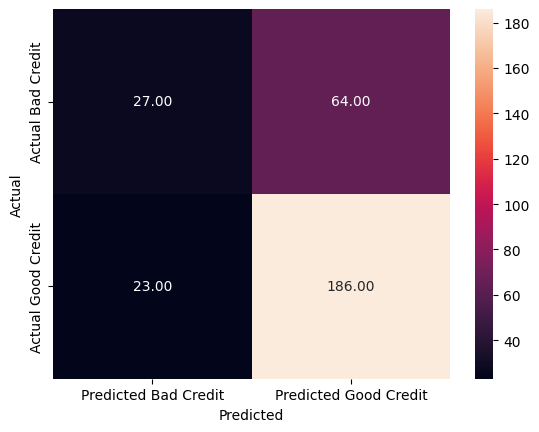

In [23]:
# Creating a confusion matrix
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels = [1, 0])
    sns.heatmap(cm, annot=True, fmt='0.2f', xticklabels=['Predicted Bad Credit', 'Predicted Good Credit'], yticklabels=['Actual Bad Credit', 'Actual Good Credit'])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

draw_cm(y_pred_df.actual, y_pred_df.predicted)

- In the above confusion matrix, the columns represent the predicted labels, while the rows represent the actual label. For example, out of 91 (27 + 64) bad credits, only 27 have been classified correctly as bad credits, and the rest 64 have been classified as good credits when the cut-off probability is 0.5. 

- Each row represents the actual bad credit and good credit observations present in the test dataset and each column represents predicted values of outcome variable. 

1. Left-top quadrant represents actual bad credit and is correctly classified as bad credit. This is called True Positive (TP).
2. Left-down quadrant represents actual good credits and is incorrectly classified as bad credit. This is called False Positive (FP).
3. Right-top quadrant represents actual bad credit and is incorrectly classified as good credit. This is called False Negative (FN).
4. Right-down quadrant represents actual good credits and is correctly classified as good credit. This is called True Negative (TN).

### Measuring Accuracies
In classification, the model performance is often measured using concepts such as sensitivity, specificity, precision, and F-score.

- Sensitivity or Recall (True Positive Rate):- Sensitivity is the conditional probability that the predicted class is positive given that the actual class is positive. Mathematically, sensitivity is given as 

    - Recall = TP / (TP + FN)

- Specificity (True Negative Rate):- Specificity is the conditional probability that the predicted class is negative given that the actual class is negative. Mathematically, specificity is given as 

    - Specificity = TN / (TN + FP)

- Precision:- Precision is the conditional probability that the actual value is positive given that the prediction by the model is positive. Mathematically, precision is given by

    - Precision = TP / (TP + FP)

- F-Score:- F-score is a measure that combines precision and recall. Mathematically, it is given as

    - F-score = (2 x Precision x Recall) / (Precision + Recall)